In [2]:
import pandas as pd
import numpy as np

## Loading spotify features dataset

In [4]:
df = pd.read_csv('data.csv')

In [5]:
df.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


## Exploring datset

In [7]:
df.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [8]:
# Check for missing values
df.isnull().sum()

Unnamed: 0          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [9]:
# Analysis of audio features
audio_features = ['acousticness','danceability','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence']

## Data Analysis

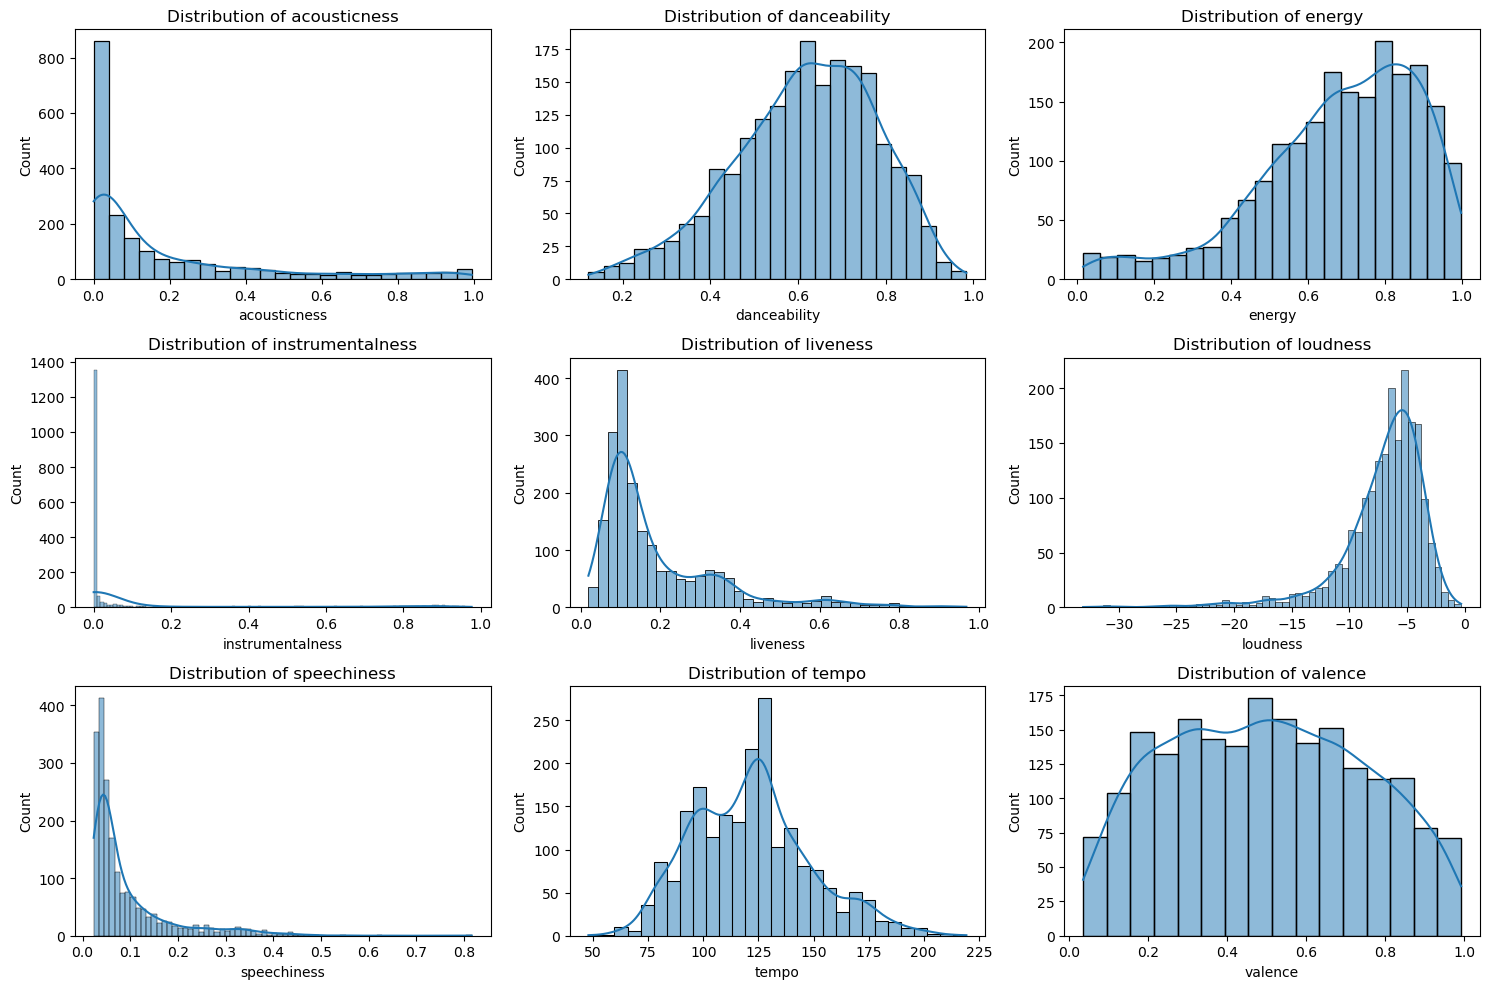

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of audio features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(audio_features):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

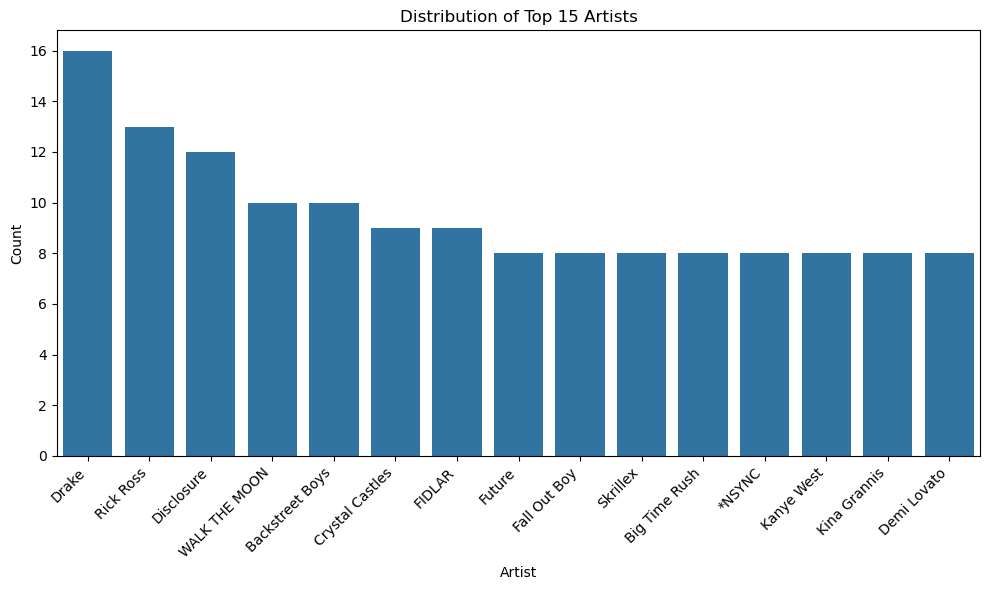

In [23]:
# Visualize the distribution of top 15 artists
plt.figure(figsize=(10, 6))
artist_counts = df['artist'].value_counts().head(15)
sns.barplot(x=artist_counts.index, y=artist_counts.values)
plt.title('Distribution of Top 15 Artists')
plt.xlabel('Artist')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

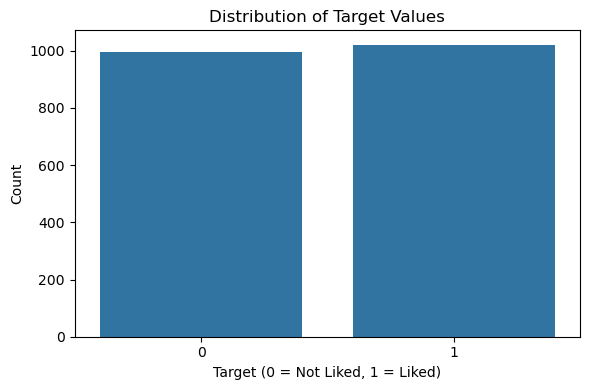

In [25]:
# Visualize the distribution of target values
plt.figure(figsize=(6, 4))
target_counts = df['target'].value_counts()
sns.barplot(x=target_counts.index, y=target_counts.values)
plt.title('Distribution of Target Values')
plt.xlabel('Target (0 = Not Liked, 1 = Liked)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

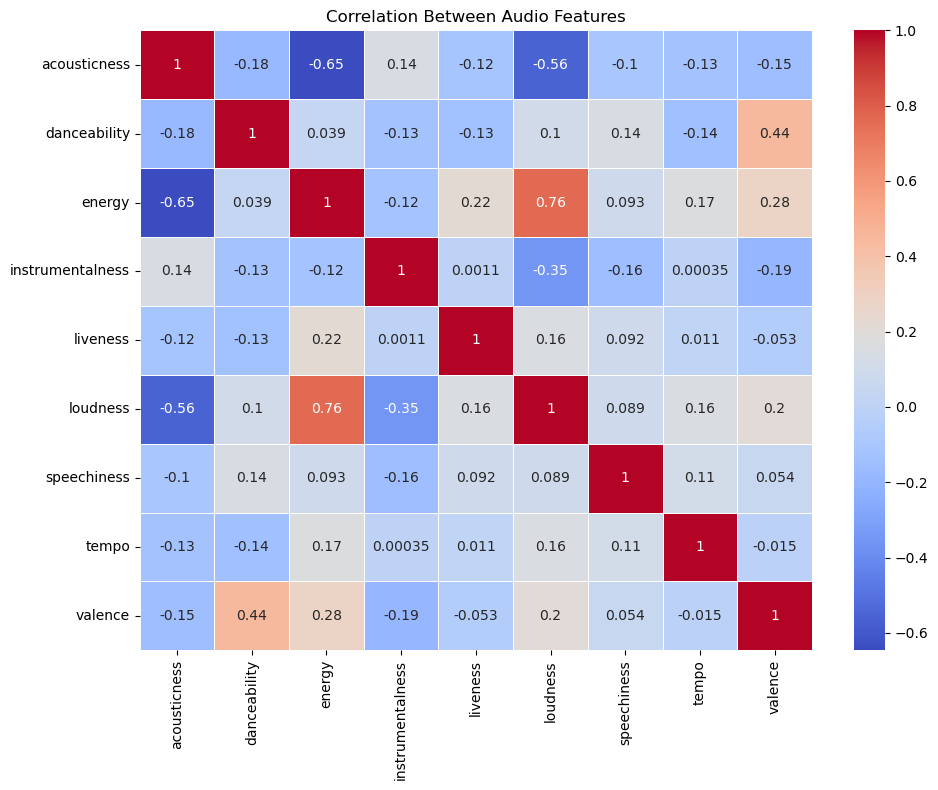

In [27]:
# Correlation between audio features
plt.figure(figsize=(10, 8))
correlation = df[audio_features].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Audio Features')
plt.tight_layout()
plt.show()

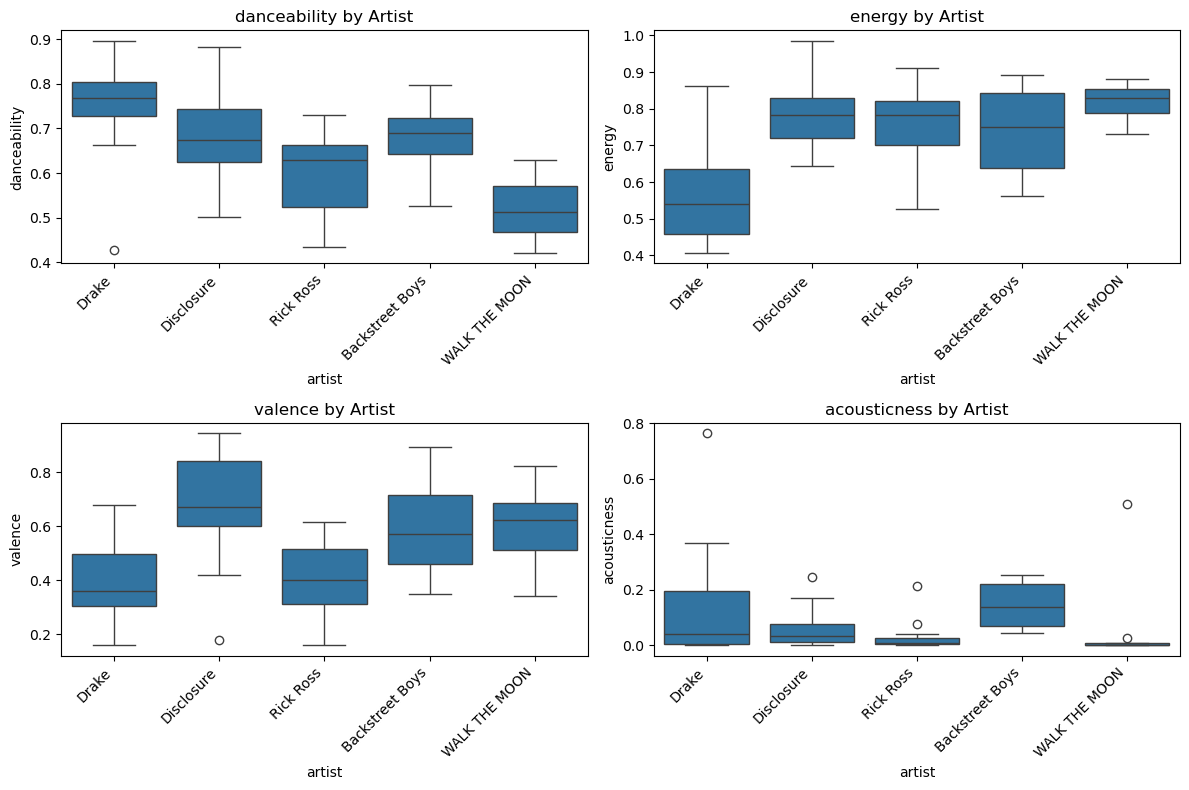

In [29]:
# Artist and audio feature relationship
plt.figure(figsize=(12, 8))
top_artist = df['artist'].value_counts().head(5).index.tolist()
artist_data = df[df['artist'].isin(top_artist)]

for i, feature in enumerate(['danceability', 'energy', 'valence', 'acousticness']):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='artist', y=feature, data=artist_data)
    plt.xticks(rotation=45, ha='right')
    plt.title(f'{feature} by Artist')
plt.tight_layout()
plt.show()

## Data Preprocessing

In [32]:
# Check for duplicate song_title and artist combinations
df['temp_song_id'] = df['song_title'] + ' - ' + df['artist']
duplicate_songs = df[df['temp_song_id'].duplicated(keep=False)]
if not duplicate_songs.empty:
    print(f"Found {len(duplicate_songs)} duplicate song entries:")
    print(duplicate_songs[['song_title', 'artist', 'target']])
    print("Keeping the first occurrence of each duplicate.")
    df = df.drop_duplicates(subset=['song_title', 'artist'], keep='first').reset_index(drop=True)
    print(f"Dataset after removing duplicates: {len(df)} rows.")
df = df.drop(columns=['temp_song_id'])

Found 69 duplicate song entries:
                            song_title           artist  target
0                             Mask Off           Future       1
15                                Char  Crystal Castles       1
27                                Char  Crystal Castles       1
50                               Annie      Neon Indian       1
52                         Coming Home     Leon Bridges       1
...                                ...              ...     ...
1746                I Want It That Way  Backstreet Boys       0
1759                            MMMBop           Hanson       0
1910  Tearin' up My Heart - Radio Edit           *NSYNC       0
1915                I Want It That Way  Backstreet Boys       0
1964                            MMMBop           Hanson       0

[69 rows x 3 columns]
Keeping the first occurrence of each duplicate.
Dataset after removing duplicates: 1982 rows.


In [34]:
# Define numerical features for outlier detection
numerical_features = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 
                     'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

In [36]:
# Outlier capping using IQR
def cap_outliers(df, features):
    df_capped = df.copy()
    capping_summary = {}
    for feature in features:
        Q1 = df_capped[feature].quantile(0.25)
        Q3 = df_capped[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Count values to be capped
        lower_outliers = (df_capped[feature] < lower_bound).sum()
        upper_outliers = (df_capped[feature] > upper_bound).sum()
        capping_summary[feature] = {'lower_capped': lower_outliers, 'upper_capped': upper_outliers}
        # Cap outliers
        df_capped[feature] = df_capped[feature].clip(lower=lower_bound, upper=upper_bound)
    return df_capped, capping_summary

In [38]:
# Apply outlier capping
df_clean, capping_summary = cap_outliers(df, numerical_features)
print(f"Outlier capping summary:")
for feature, summary in capping_summary.items():
    print(f"{feature}: {summary['lower_capped']} values capped at lower bound, {summary['upper_capped']} values capped at upper bound")
print(f"Dataset size after capping outliers: {len(df_clean)} rows.")

Outlier capping summary:
acousticness: 0 values capped at lower bound, 189 values capped at upper bound
danceability: 11 values capped at lower bound, 0 values capped at upper bound
duration_ms: 10 values capped at lower bound, 127 values capped at upper bound
energy: 54 values capped at lower bound, 0 values capped at upper bound
instrumentalness: 0 values capped at lower bound, 410 values capped at upper bound
liveness: 0 values capped at lower bound, 126 values capped at upper bound
loudness: 103 values capped at lower bound, 0 values capped at upper bound
speechiness: 0 values capped at lower bound, 206 values capped at upper bound
tempo: 0 values capped at lower bound, 14 values capped at upper bound
valence: 0 values capped at lower bound, 0 values capped at upper bound
Dataset size after capping outliers: 1982 rows.


In [40]:
#Function Transform log techinque
from scipy.stats import skew

# Function to select features for log1p transformation
def select_features_for_log1p(df, features, skew_threshold=0.75):
    features_to_transform = []
    for feature in features:
        feature_skew = skew(df[feature].dropna())
        if feature_skew > skew_threshold or feature in ['loudness', 'tempo']:
            features_to_transform.append(feature)
    return features_to_transform

# Function to apply log1p transformation
def apply_log1p_transformation(df, features):
    df_transformed = df.copy()
    for feature in features:
        if feature == 'loudness':
            min_loudness = df_transformed[feature].min()
            shift = abs(min_loudness) + 1
            df_transformed[feature] = np.log1p(df_transformed[feature] + shift)
        else:
            df_transformed[feature] = df_transformed[feature].clip(lower=0)
            df_transformed[feature] = np.log1p(df_transformed[feature])
    return df_transformed

# Apply log1p transformation
features_to_transform = select_features_for_log1p(df_clean, audio_features)
df_clean = apply_log1p_transformation(df_clean, features_to_transform)

In [42]:
# Using preprocessing to dataset
from sklearn.preprocessing import MinMaxScaler

df_scaled = df_clean.copy()
scaler = MinMaxScaler()
df_scaled[audio_features] = scaler.fit_transform(df_clean[audio_features])

## Feature Engineering

In [45]:
# Add artist information using one-hot encoding
artist_dummies = pd.get_dummies(df_scaled['artist'], prefix='artist')

# Combine audio features with artist encoding
feature_matrix = pd.concat([df_scaled[audio_features], artist_dummies], axis=1)

# Create a mapping from song_id to index
df_scaled['song_id'] = df_scaled['song_title'] + ' - ' + df_scaled['artist']
track_indices = pd.Series(df_scaled.index, index=df_scaled['song_id'])

# Save outputs
feature_matrix.to_csv('feature_matrix.csv', index=False)
track_indices.to_csv('track_indices.csv')
df_scaled.to_csv('processed_data.csv', index=False)
print("Preprocessing complete. Saved feature_matrix.csv, track_indices.csv, processed_data.csv")

Preprocessing complete. Saved feature_matrix.csv, track_indices.csv, processed_data.csv


## Model Training

In [57]:
from scipy.sparse import csr_matrix

# Load preprocessed data
feature_matrix = pd.read_csv('feature_matrix.csv')
track_indices = pd.read_csv('track_indices.csv', index_col=0)
processed_data = pd.read_csv('processed_data.csv')

In [71]:
from sklearn.decomposition import TruncatedSVD
import warnings

# Suppress RuntimeWarning for explained_variance_ratio_
warnings.filterwarnings("ignore", category=RuntimeWarning, module="sklearn.decomposition._truncated_svd")

# Configuration: Set to False to skip SVD and use target as collab_scores
USE_SVD = False

# Check target distribution
print("Target distribution:")
print(processed_data['target'].value_counts(normalize=True))

# Collaborative Filtering
if USE_SVD:
    if processed_data['target'].nunique() == 1:
        print("Warning: 'target' has only one unique value. Using zero scores.")
        collab_scores = np.zeros(len(processed_data))
    else:
        # Simulate user-item matrix
        user_item_matrix = pd.DataFrame({
            'user_id': ['user_1'] * len(processed_data),
            'song_id': processed_data['song_id'],
            'rating': processed_data['target']
        })

        # Pivot to create user-item matrix
        try:
            user_item_pivot = user_item_matrix.pivot(index='user_id', columns='song_id', values='rating').fillna(0)
        except ValueError as e:
            print(f"Error during pivot: {e}")
            raise

        user_item_sparse = csr_matrix(user_item_pivot.values)

        # Check matrix sparsity
        non_zero_count = user_item_sparse.nnz
        total_elements = user_item_sparse.shape[0] * user_item_sparse.shape[1]
        print(f"User-item matrix: {user_item_sparse.shape}, non-zero entries: {non_zero_count} ({non_zero_count / total_elements:.2%})")

        # Apply SVD
        try:
            svd = TruncatedSVD(n_components=1, random_state=42)  # Reduced to 1 due to rank-1 matrix
            latent_matrix = svd.fit_transform(user_item_sparse)
            song_latent_matrix = svd.components_.T
            collab_scores = np.dot(latent_matrix, svd.components_)[0]
        except ValueError as e:
            print(f"SVD failed: {e}. Using zero scores.")
            collab_scores = np.zeros(user_item_sparse.shape[1])
else:
    # Use target as collaborative scores (no SVD)
    print("Skipping SVD. Using normalized target as collaborative scores.")
    collab_scores = processed_data['target'].values

# Normalize collaborative scores to [0, 1]
if np.any(collab_scores):
    collab_scores = (collab_scores - collab_scores.min()) / (collab_scores.max() - collab_scores.min())
else:
    collab_scores = np.zeros(len(processed_data))
    print("Collaborative scores are all zero. Relying on content-based filtering.")


Target distribution:
target
1    0.501009
0    0.498991
Name: proportion, dtype: float64
Skipping SVD. Using normalized target as collaborative scores.


In [75]:
from sklearn.metrics.pairwise import cosine_similarity

# Content-Based Filtering: Compute cosine similarity
similarity_matrix = cosine_similarity(feature_matrix)
similarity_df = pd.DataFrame(similarity_matrix, index=processed_data['song_id'], columns=processed_data['song_id'])

In [77]:
# Hybrid Recommendation Function
def hybrid_recommend(song_id, n_recommendations=5, content_weight=0.9):
    if song_id not in similarity_df.index:
        return f"Song {song_id} not found."
    
    # Content-based scores
    content_scores = similarity_df.loc[song_id]
    
    # Collaborative scores (aligned with song_id order)
    collab_df = pd.Series(collab_scores, index=user_item_pivot.columns if 'user_item_pivot' in locals() else processed_data['song_id'])
    
    # Combine scores
    hybrid_scores = content_weight * content_scores + (1 - content_weight) * collab_df
    
    # Exclude the input song and sort
    hybrid_scores = hybrid_scores.drop(song_id, errors='ignore')
    recommendations = hybrid_scores.sort_values(ascending=False).head(n_recommendations)
    
    return recommendations.index.tolist()

# Save similarity matrix and collaborative scores
similarity_df.to_csv('similarity_matrix.csv')
np.save('collab_scores.npy', collab_scores)

# Example: Recommend songs similar to "Mask Off - Future"
print("Recommendations for 'Mask Off - Future':")
print(hybrid_recommend('Mask Off - Future', n_recommendations=5))

Recommendations for 'Mask Off - Future':
['Xanny Family - Future', 'Move That Dope - Future', 'Lay Up - Future', 'Blood On the Money - Future', 'Blow a Bag - Future']


## Evaluate the models

In [79]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(processed_data, test_size=0.2, random_state=42)

In [81]:
# Hybrid recommendation function
def hybrid_recommend(song_id, n_recommendations=5, content_weight=0.9):
    if song_id not in similarity_df.index:
        return []
    content_scores = similarity_df.loc[song_id]
    collab_df = pd.Series(collab_scores, index=similarity_df.columns)
    hybrid_scores = content_weight * content_scores + (1 - content_weight) * collab_df
    hybrid_scores = hybrid_scores.drop(song_id, errors='ignore')
    return hybrid_scores.sort_values(ascending=False).head(n_recommendations).index.tolist()

In [86]:
# Precision@k
def precision_at_k(test_data, k=5):
    relevant_songs = test_data[test_data['target'] == 1]['song_id'].tolist()
    if not relevant_songs:
        print("No relevant songs (target=1) in test set.")
        return 0.0
    precisions = []
    for song_id in relevant_songs[:10]:  # Evaluate on subset
        recommended = hybrid_recommend(song_id, n_recommendations=k)
        relevant_recommended = len([s for s in recommended if s in relevant_songs])
        precisions.append(relevant_recommended / k)
    return np.mean(precisions) if precisions else 0.0

In [94]:
# Evaluate
precision = precision_at_k(test_data, k=5)
print(f"Precision@5: {precision:.4f}")

# Qualitative evaluation
test_song = 'Mask Off - Future'
print(f"\nRecommendations for '{test_song}':")
print(hybrid_recommend(test_song, n_recommendations=5))

Precision@5: 0.2200

Recommendations for 'Mask Off - Future':
['Xanny Family - Future', 'Move That Dope - Future', 'Lay Up - Future', 'Blood On the Money - Future', 'Blow a Bag - Future']
